# Rozpoznawanie typów Pokemonów

###### Konrad Magiera 291090, Mateusz Smoliński 291099

`Importy` potrzebne do całości projektu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon = pokemon.drop(["#"],axis = 1)
pokemon = pokemon.set_index('Name')
pokemon.rename(columns={'Type 1':'Type1', 'Type 2':'Type2', 'Sp. Atk':'SpAtk', 'Sp. Def':'SpDef'}, inplace=True)
pokemon.head()

Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
Name                                                                      
Bulbasaur              Grass  Poison    318  45      49       49     65   
Ivysaur                Grass  Poison    405  60      62       63     80   
Venusaur               Grass  Poison    525  80      82       83    100   
VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   
Charmander              Fire     NaN    309  39      52       43     60   

                       SpDef  Speed  Generation  Legendary  
Name                                                        
Bulbasaur                 65     45           1      False  
Ivysaur                   80     60           1      False  
Venusaur                 100     80           1      False  
VenusaurMega Venusaur    120     80           1      False  
Charmander                50     65           1      False

In [3]:
pokemon_corr = pokemon.corr()
pokemon_corr = pokemon_corr.drop(["Generation", "Legendary"],axis = 1)
pokemon_corr

Total        HP    Attack   Defense     SpAtk     SpDef  \
Total       1.000000  0.618748  0.736211  0.612787  0.747250  0.717609   
HP          0.618748  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.736211  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.612787  0.239622  0.438687  1.000000  0.223549  0.510747   
SpAtk       0.747250  0.362380  0.396362  0.223549  1.000000  0.506121   
SpDef       0.717609  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.575943  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.048384  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.501758  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  
Total       0.575943  
HP          0.175952  
Attack      0.381240  
Defense     0.015227  
SpAtk       0.473018  
SpDef       0.259133  
Speed       1.000000  
Generation -0.023121  
Legendary   0.326715

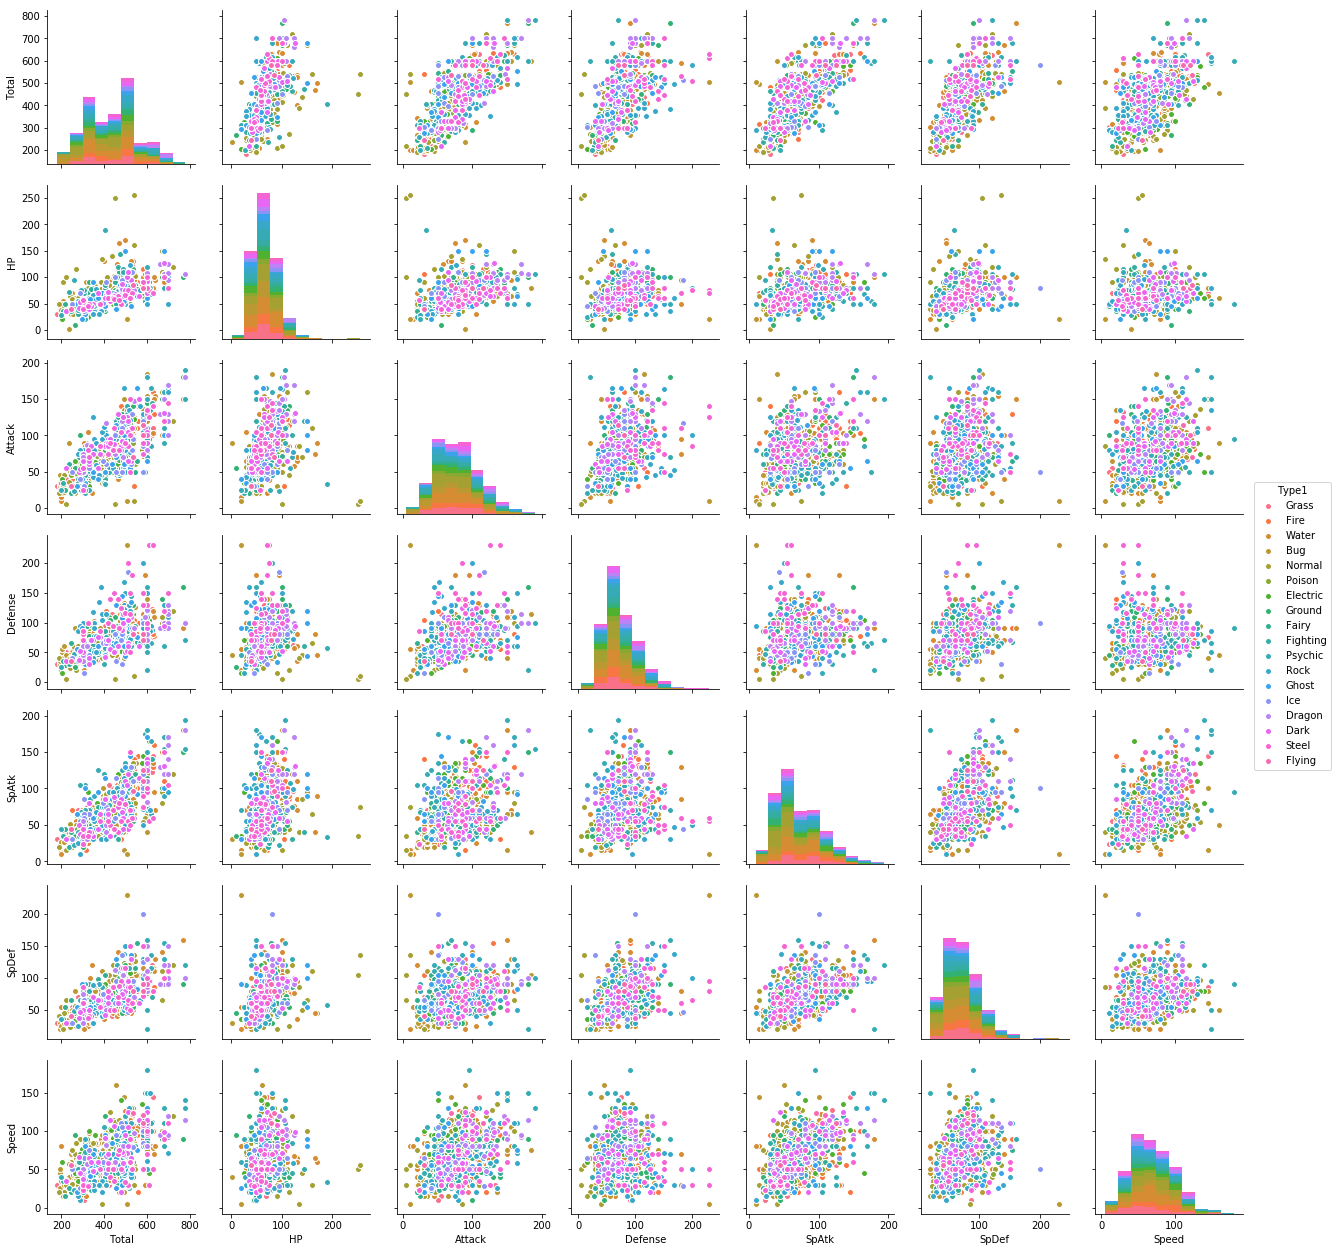

In [4]:
pokemon_wykres_type1 = pokemon.drop(["Generation", "Legendary"],axis = 1)
sns.pairplot(pokemon_wykres_type1, kind="scatter", hue="Type1")
plt.show()

Usuwam 386 pokemonow z type 2 == NaN


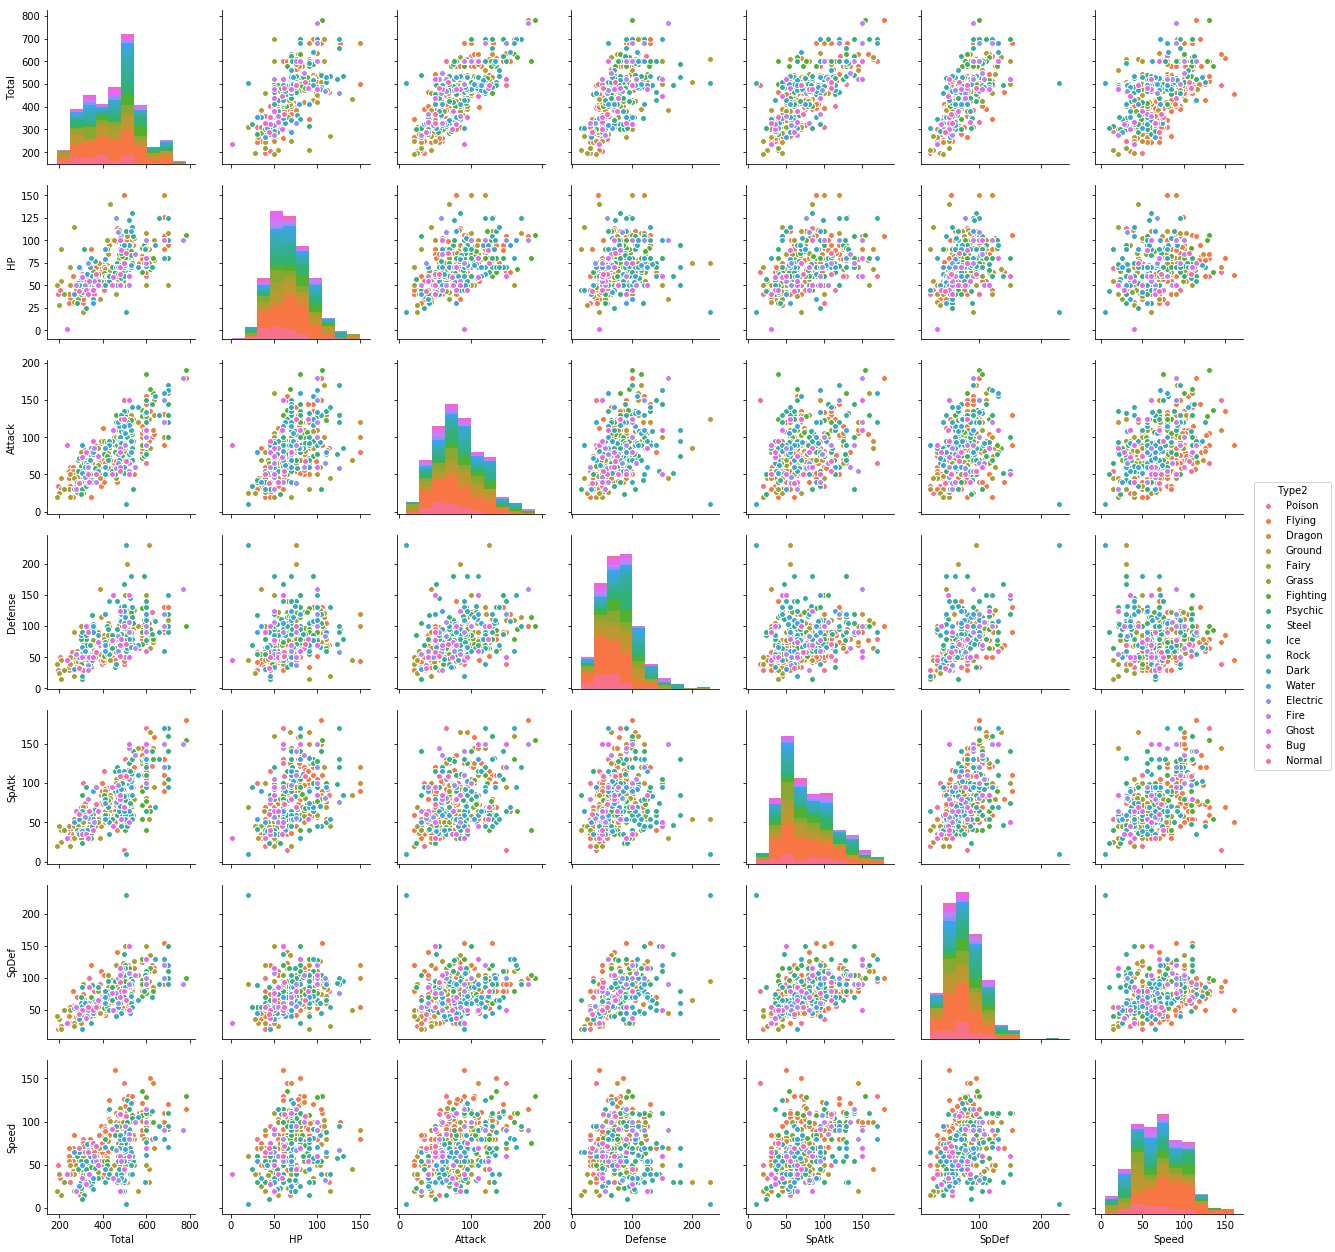

In [5]:
pokemon_wykres_type2 = pokemon_wykres_type1.dropna(axis = 0, how="any")
print("Usuwam %d pokemonow z type 2 == NaN" % sum(pd.isnull(pokemon["Type2"])))
sns.pairplot(pokemon_wykres_type2, kind="scatter", hue="Type2")
plt.show()

Dla każdego typu nowy wykres korelacji. Możliwe, że atatystyki będą bardziej skorelowane w obrębie typów niż ogółu. Dodatkowo wykresy będą czytelniejsze niż gdy wszystkie typy są na jednym wykresie.
Po dodaniu `hue="Type1` otrzymamy korelacje dla pokemonów posiadających też 2 typy, więc pojawią się na każdym wykresie możliwe kombinacje do obecnie badanego typu. Bez `hue` warto użyć `print(typ)` przed każdym wykresem

Grass


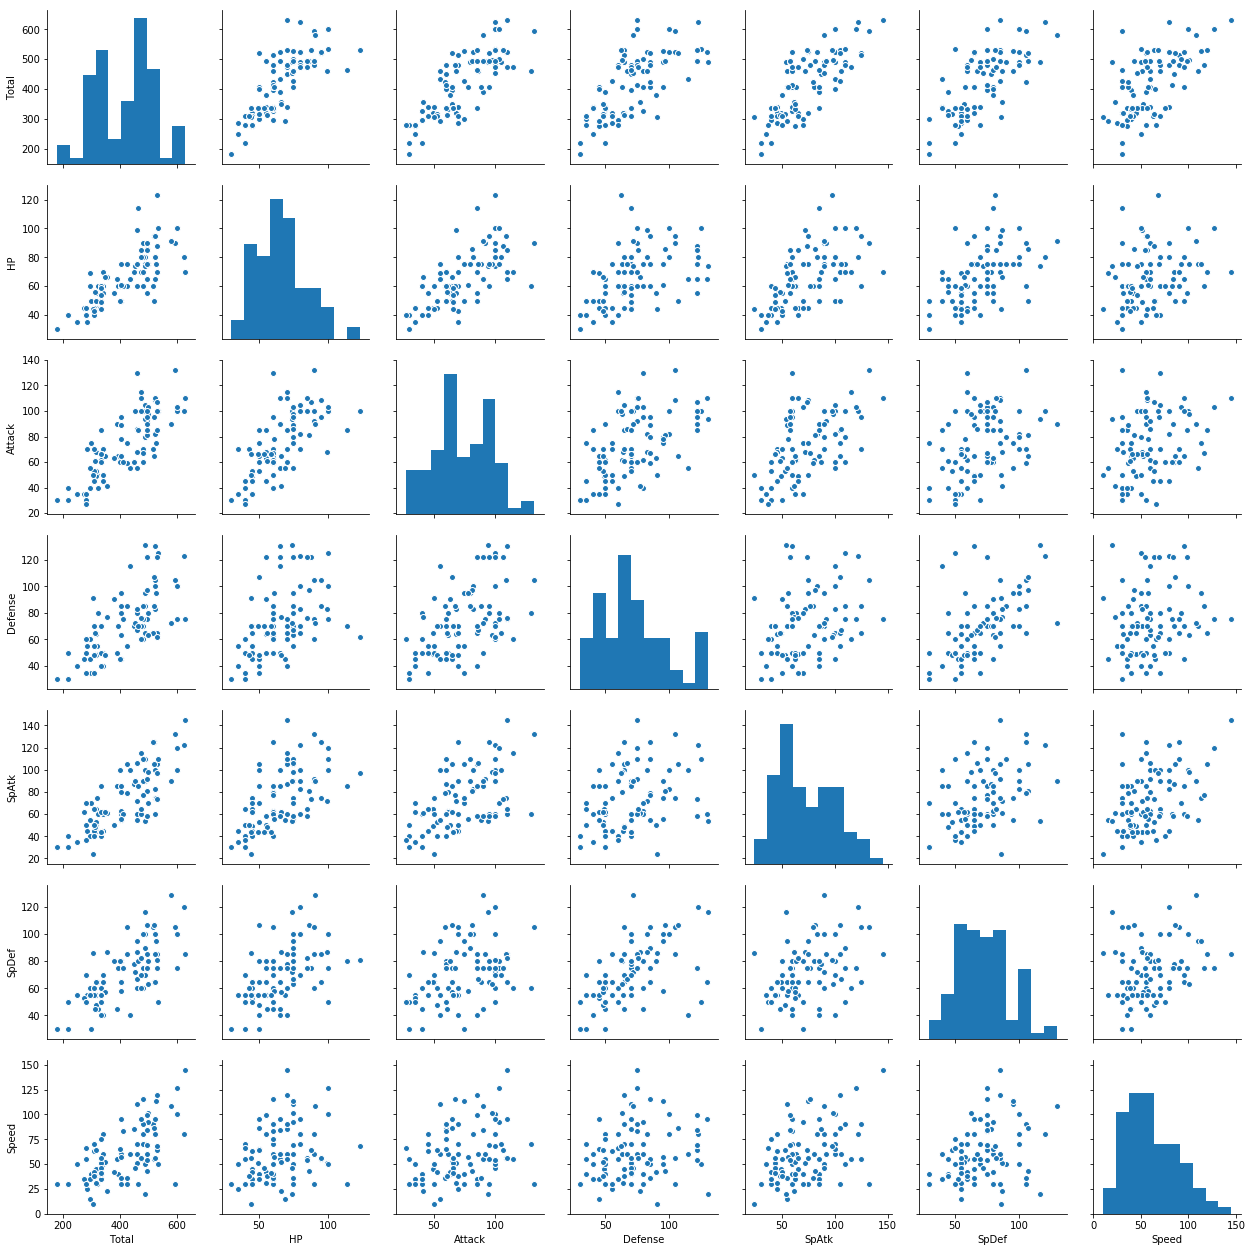

Fire


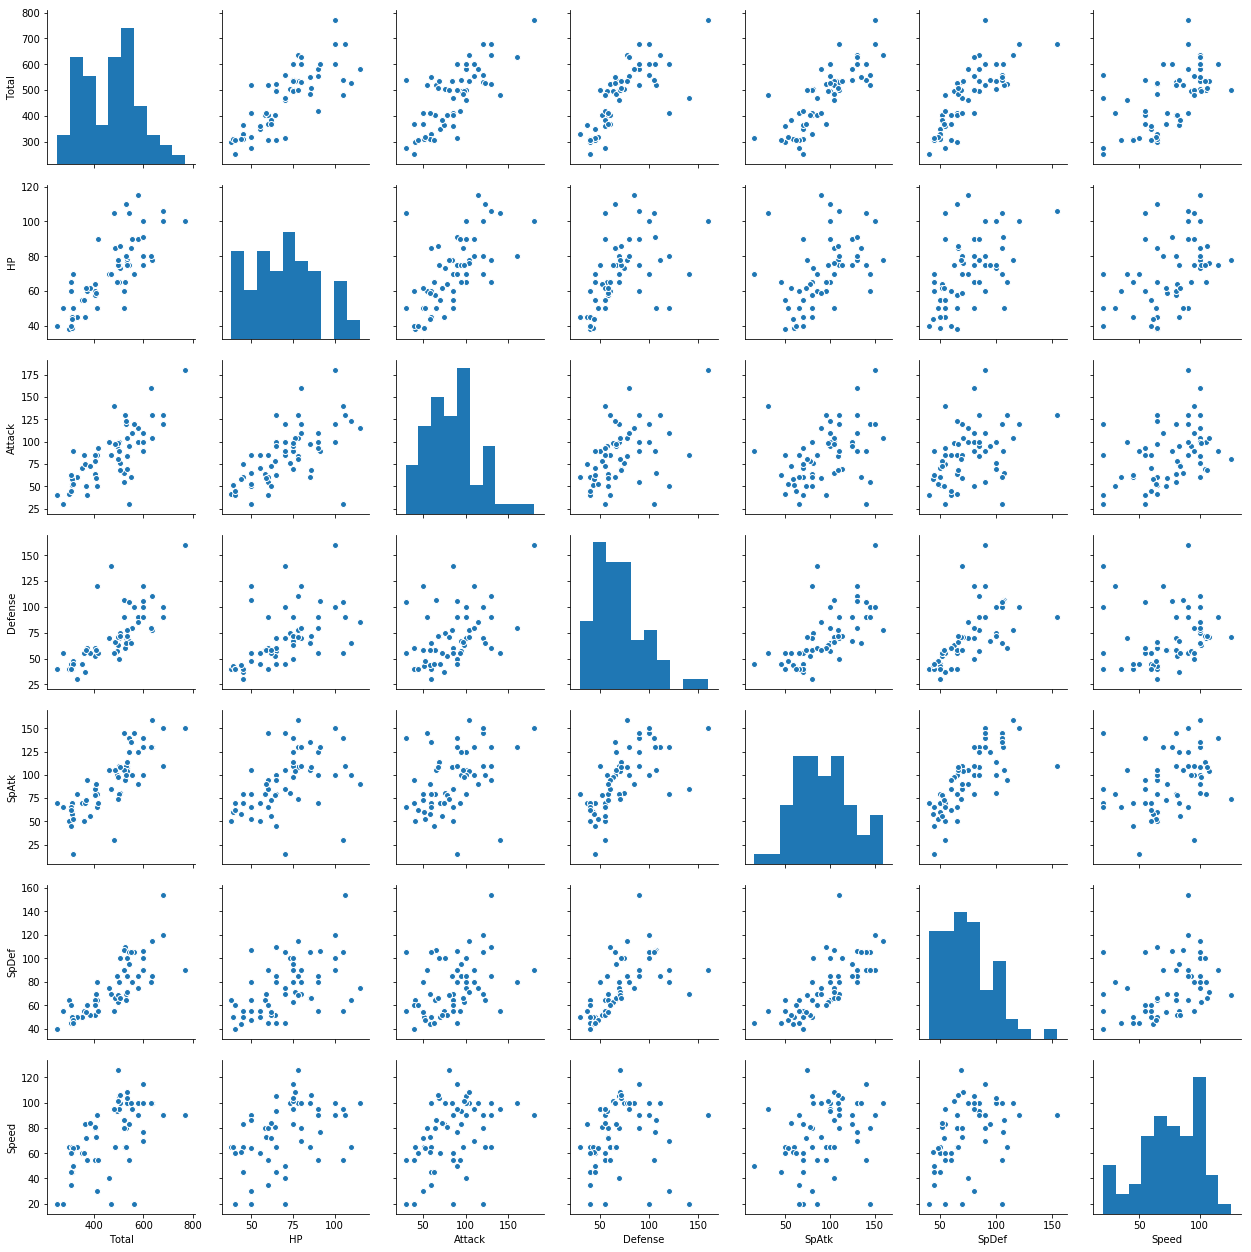

Water


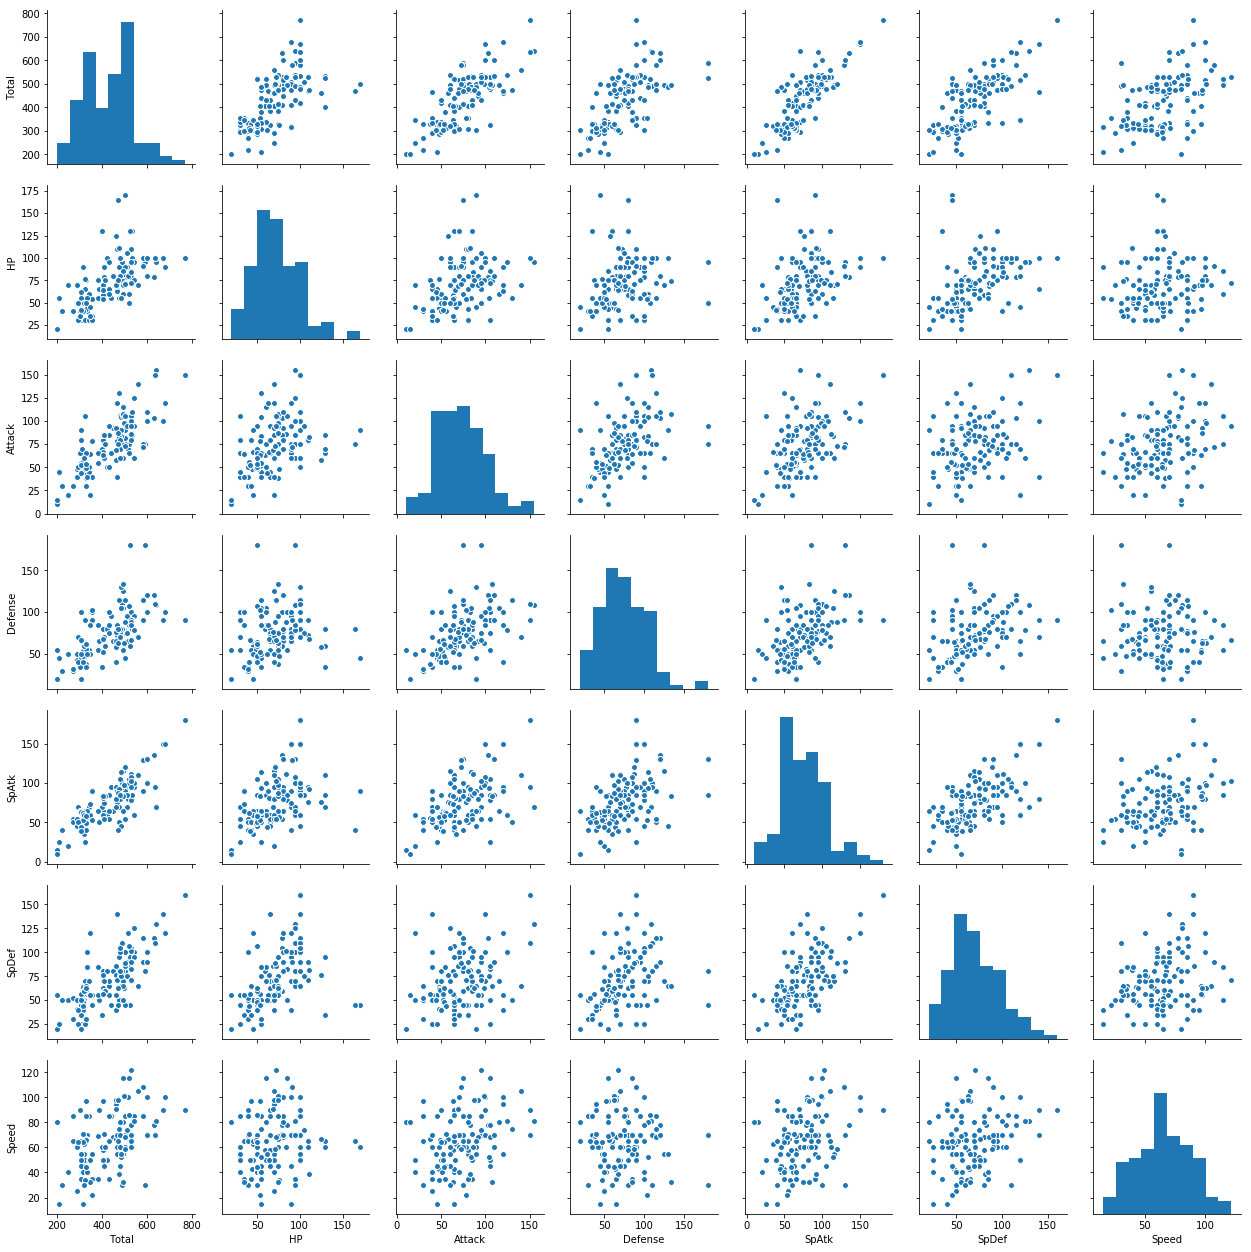

Bug


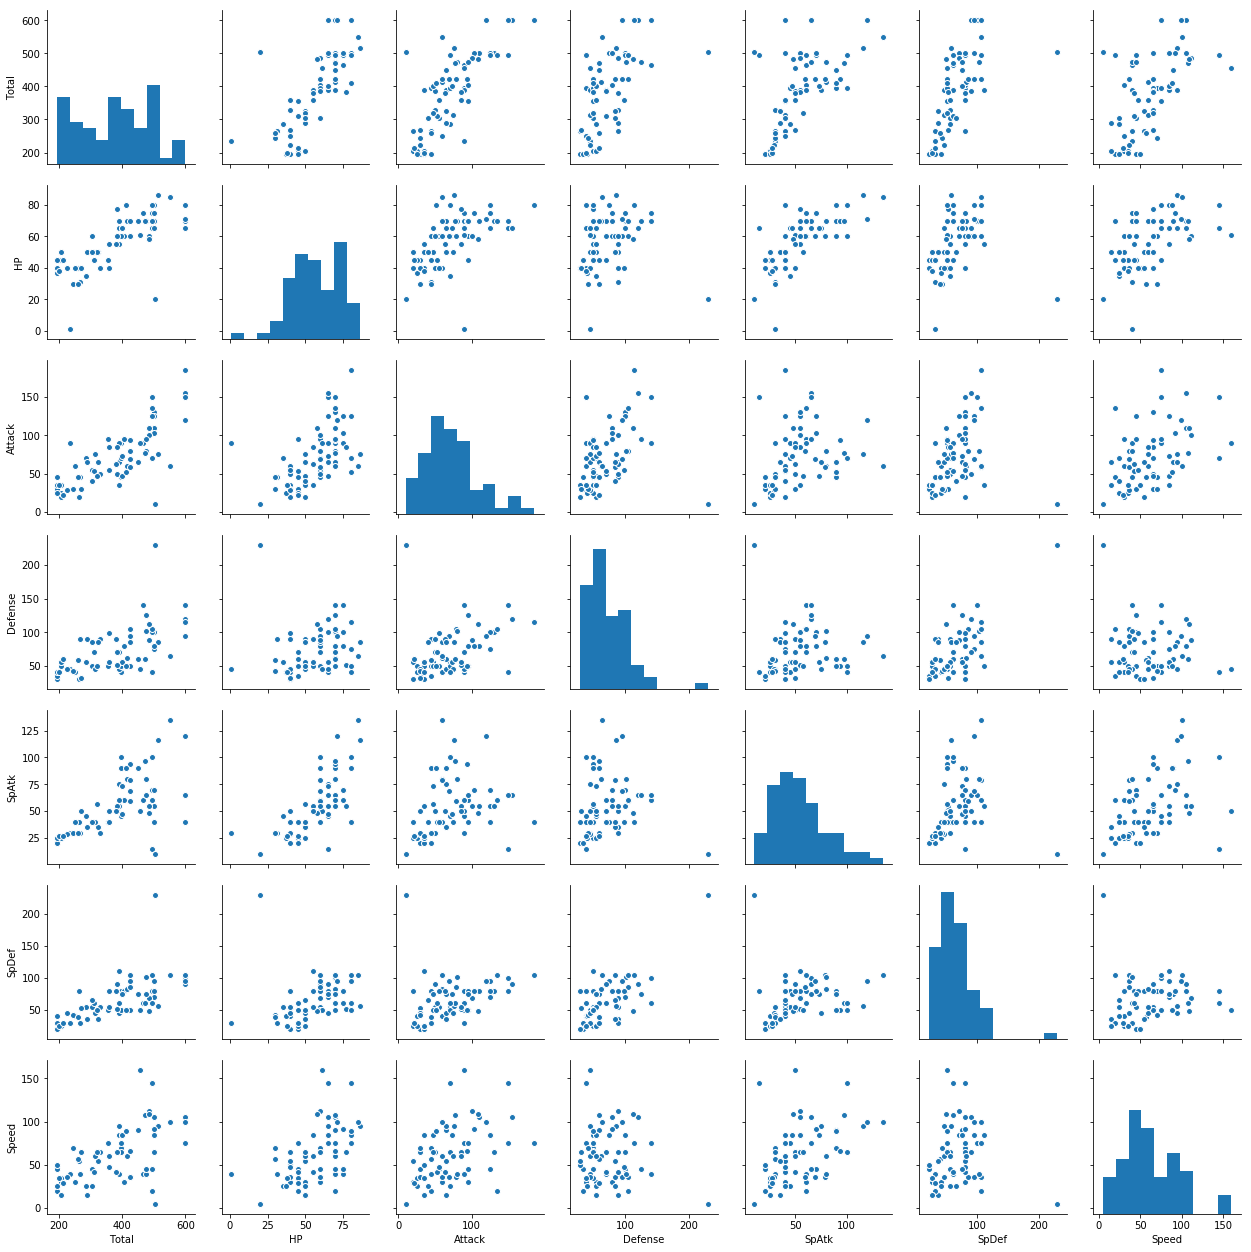

Normal


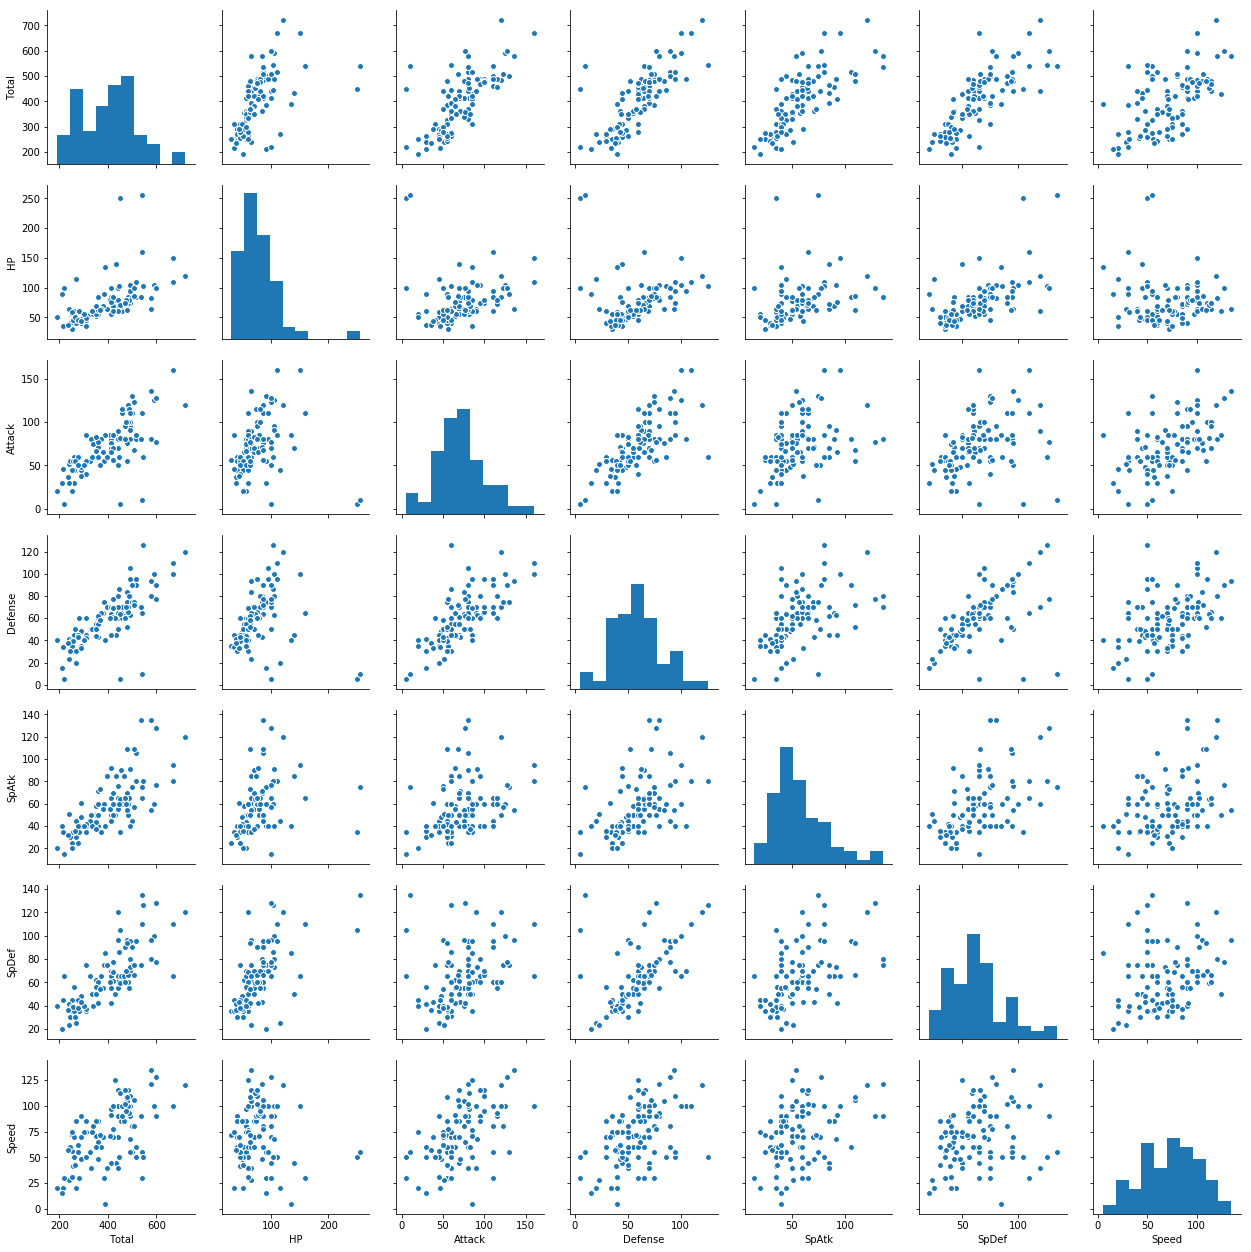

Poison


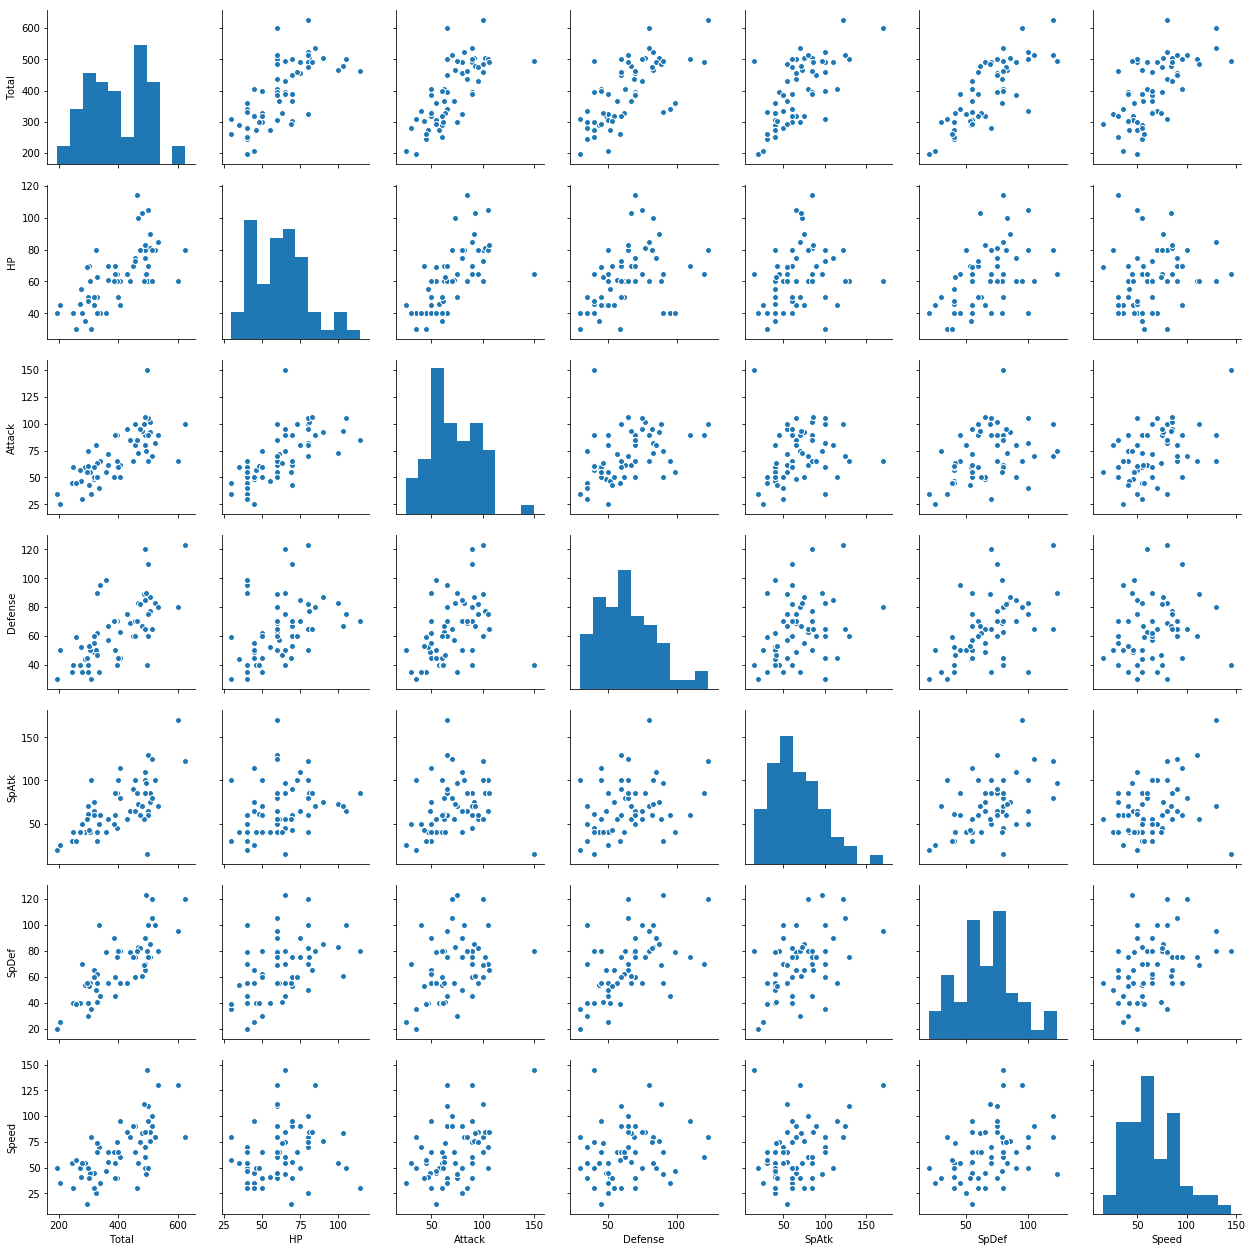

Electric


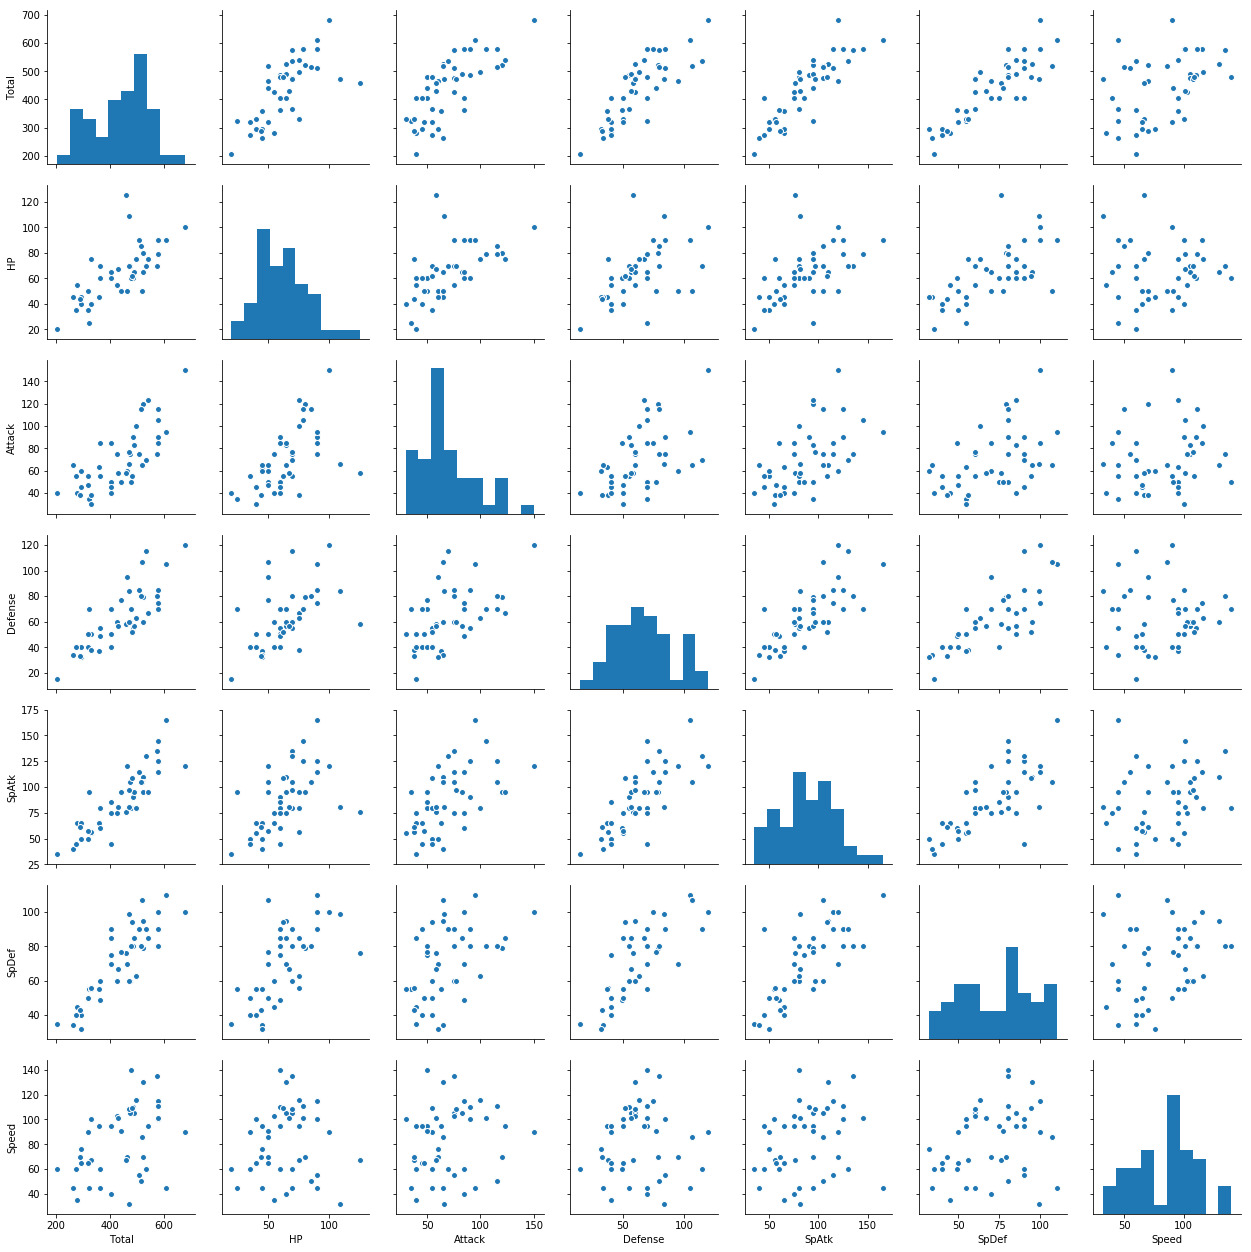

Ground


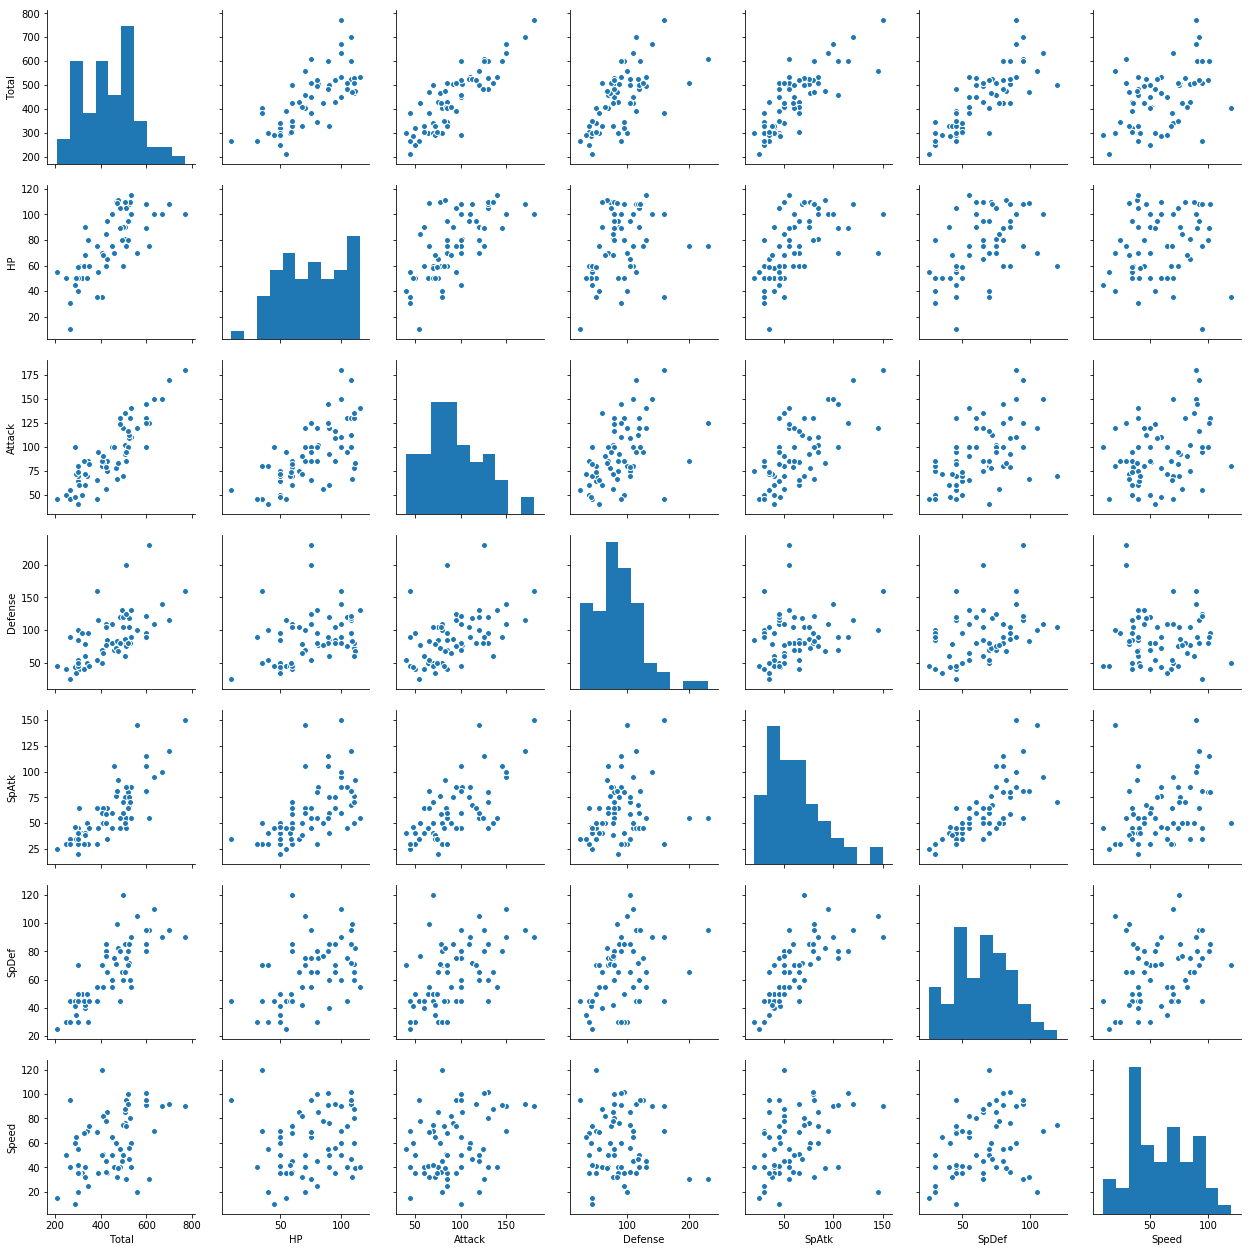

Fairy


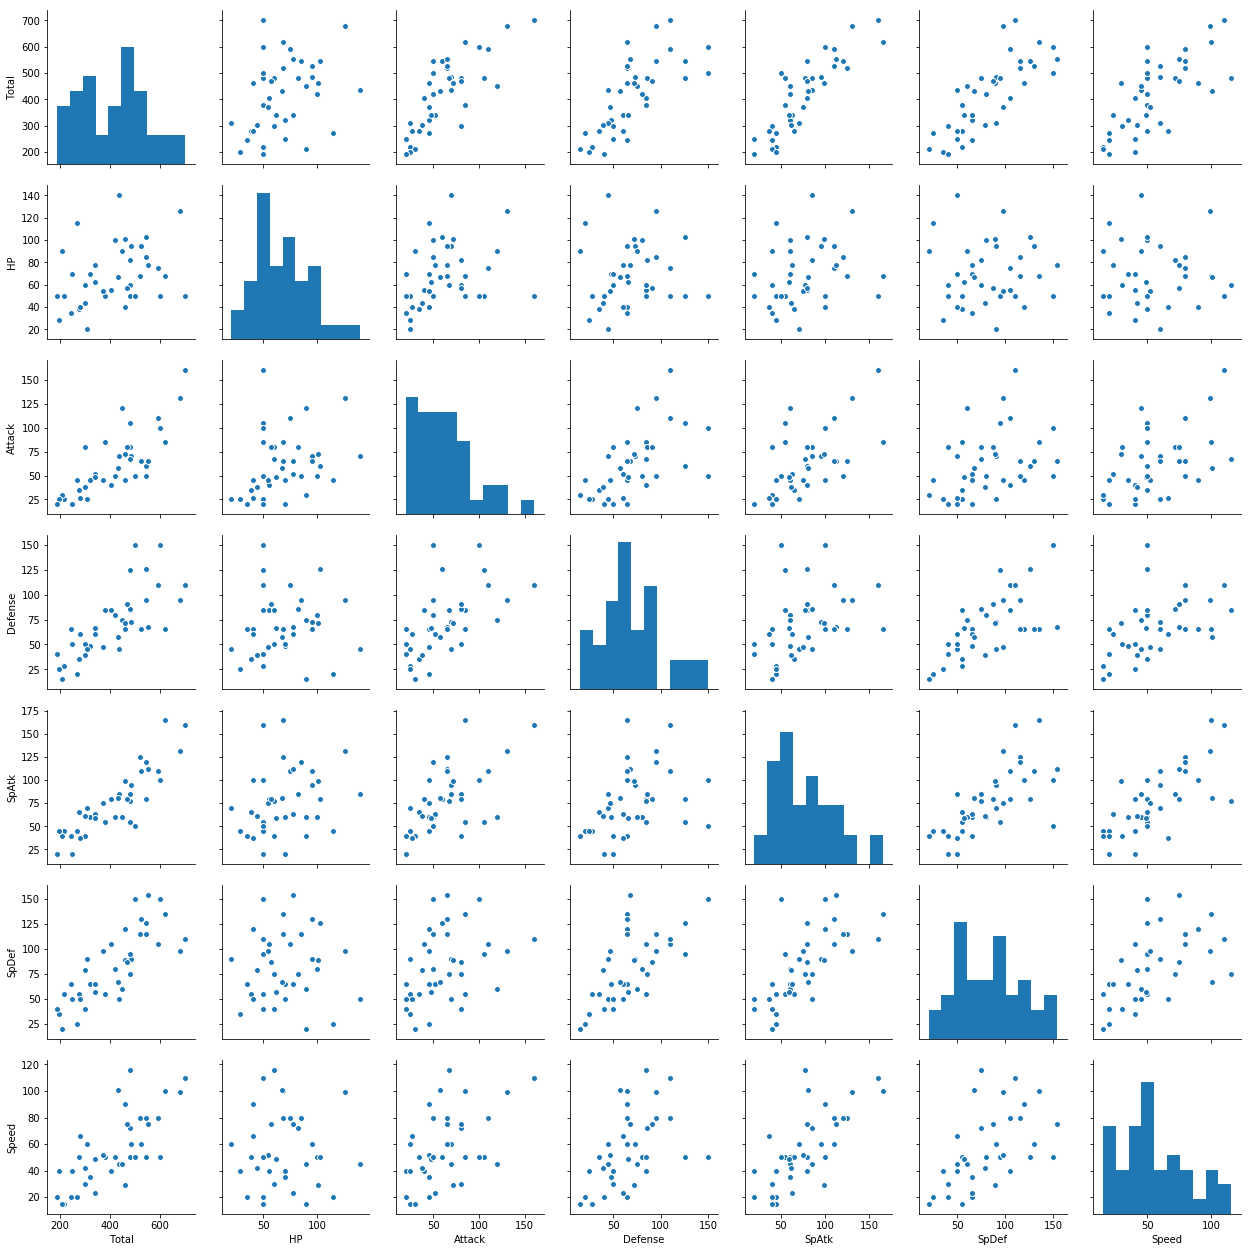

Fighting


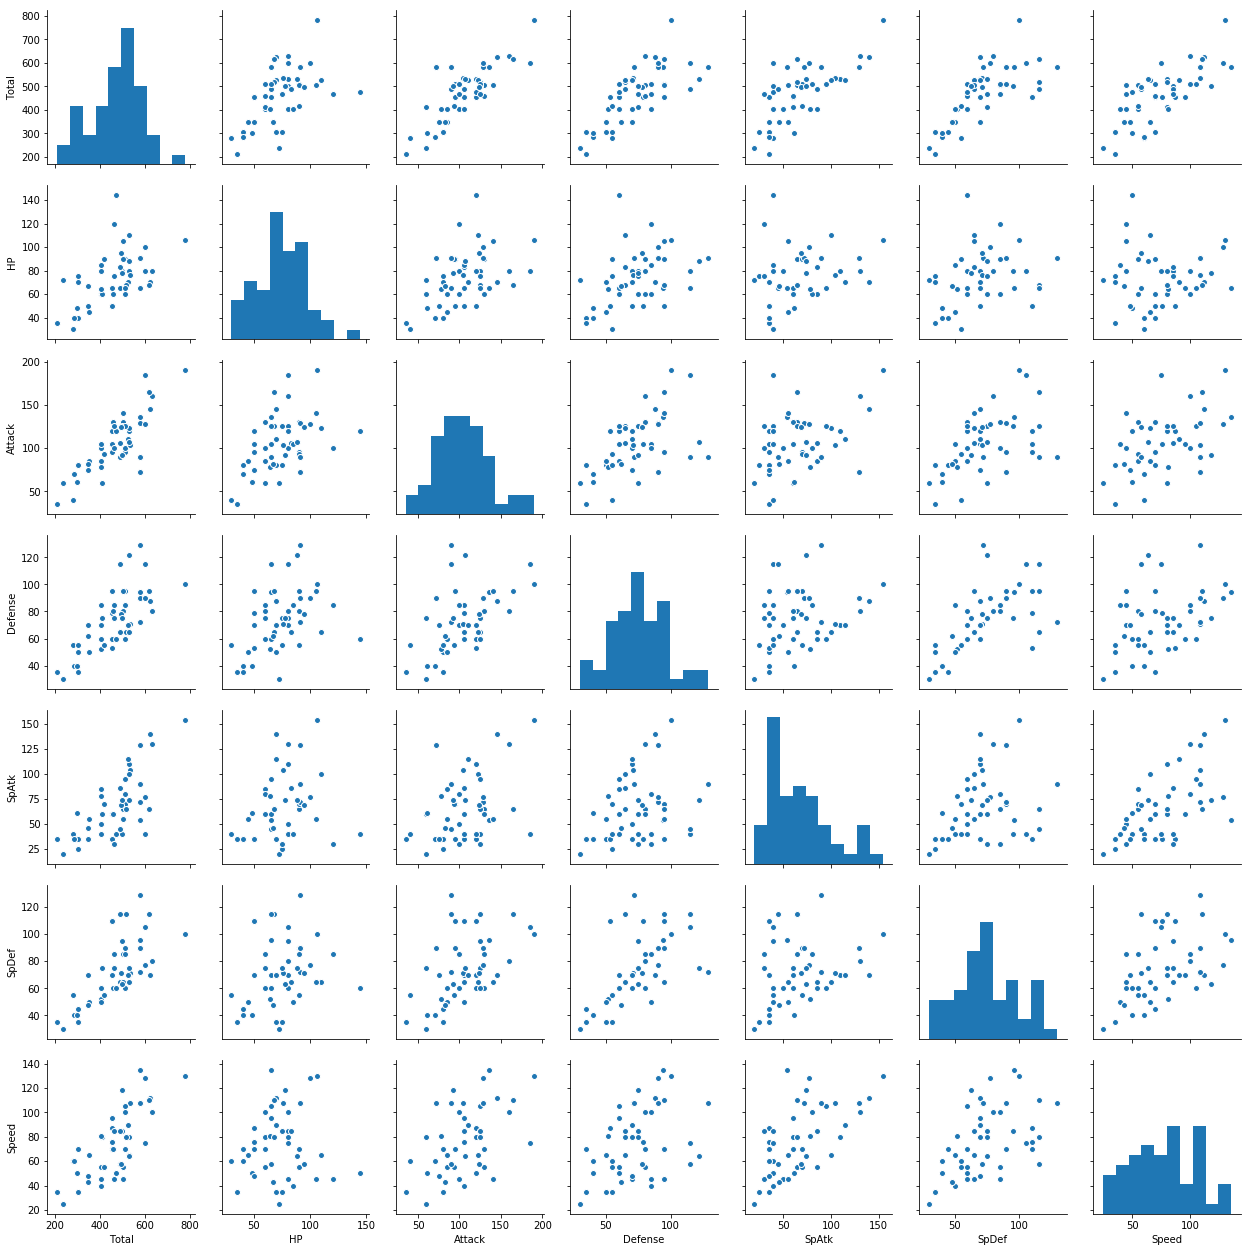

Psychic


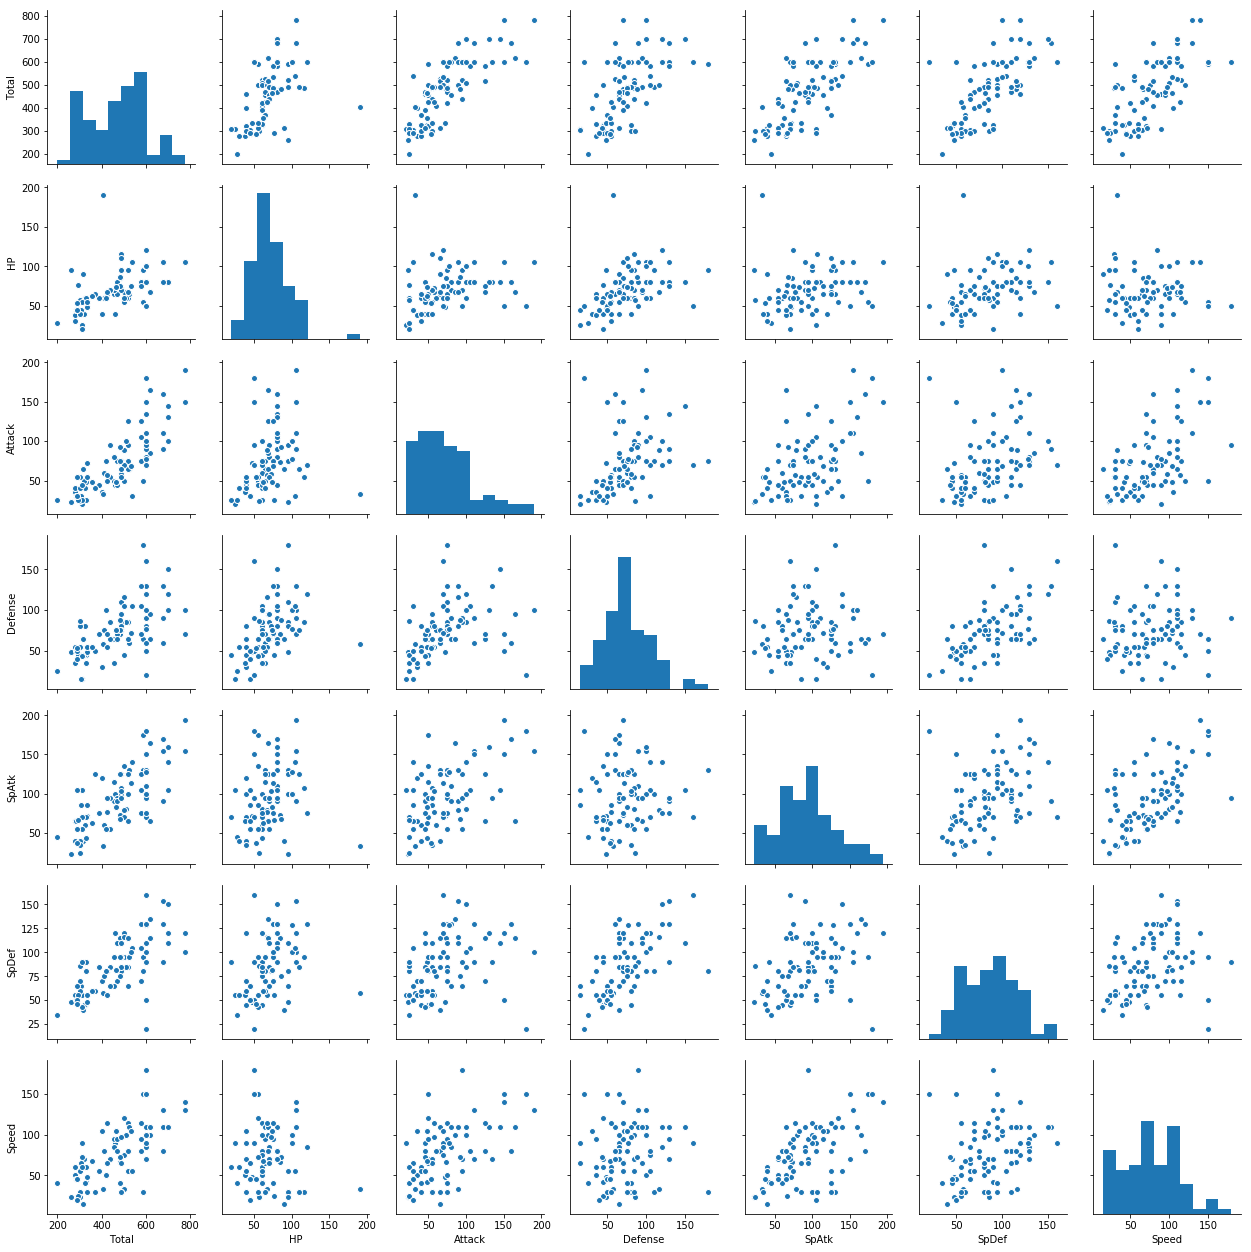

Rock


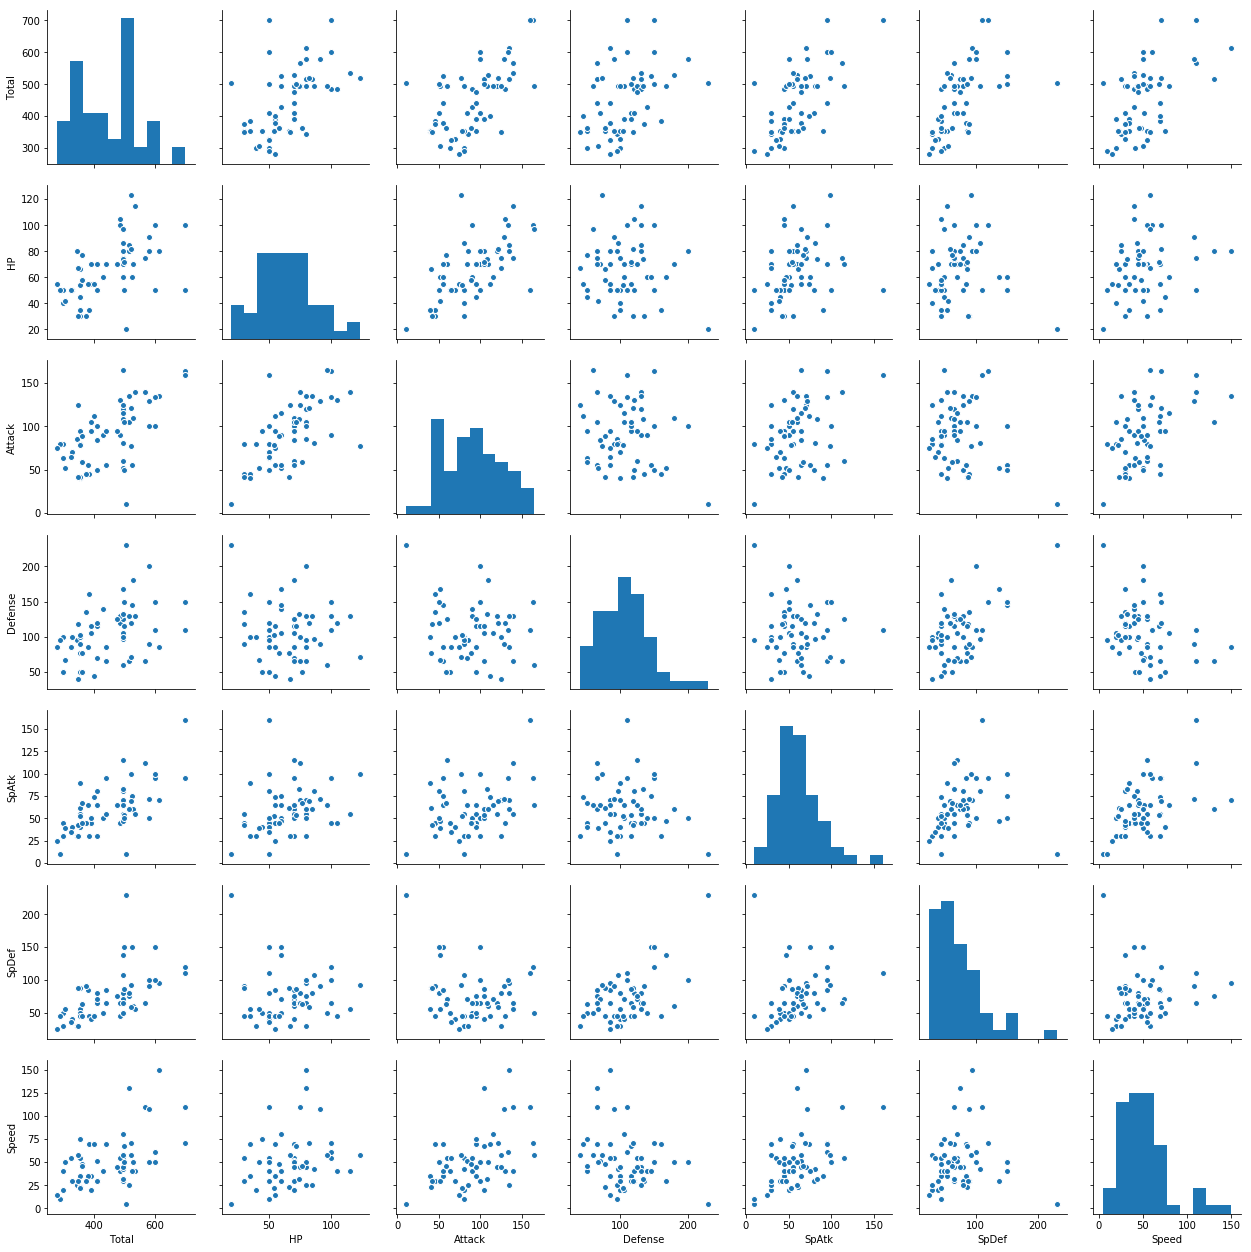

Ghost


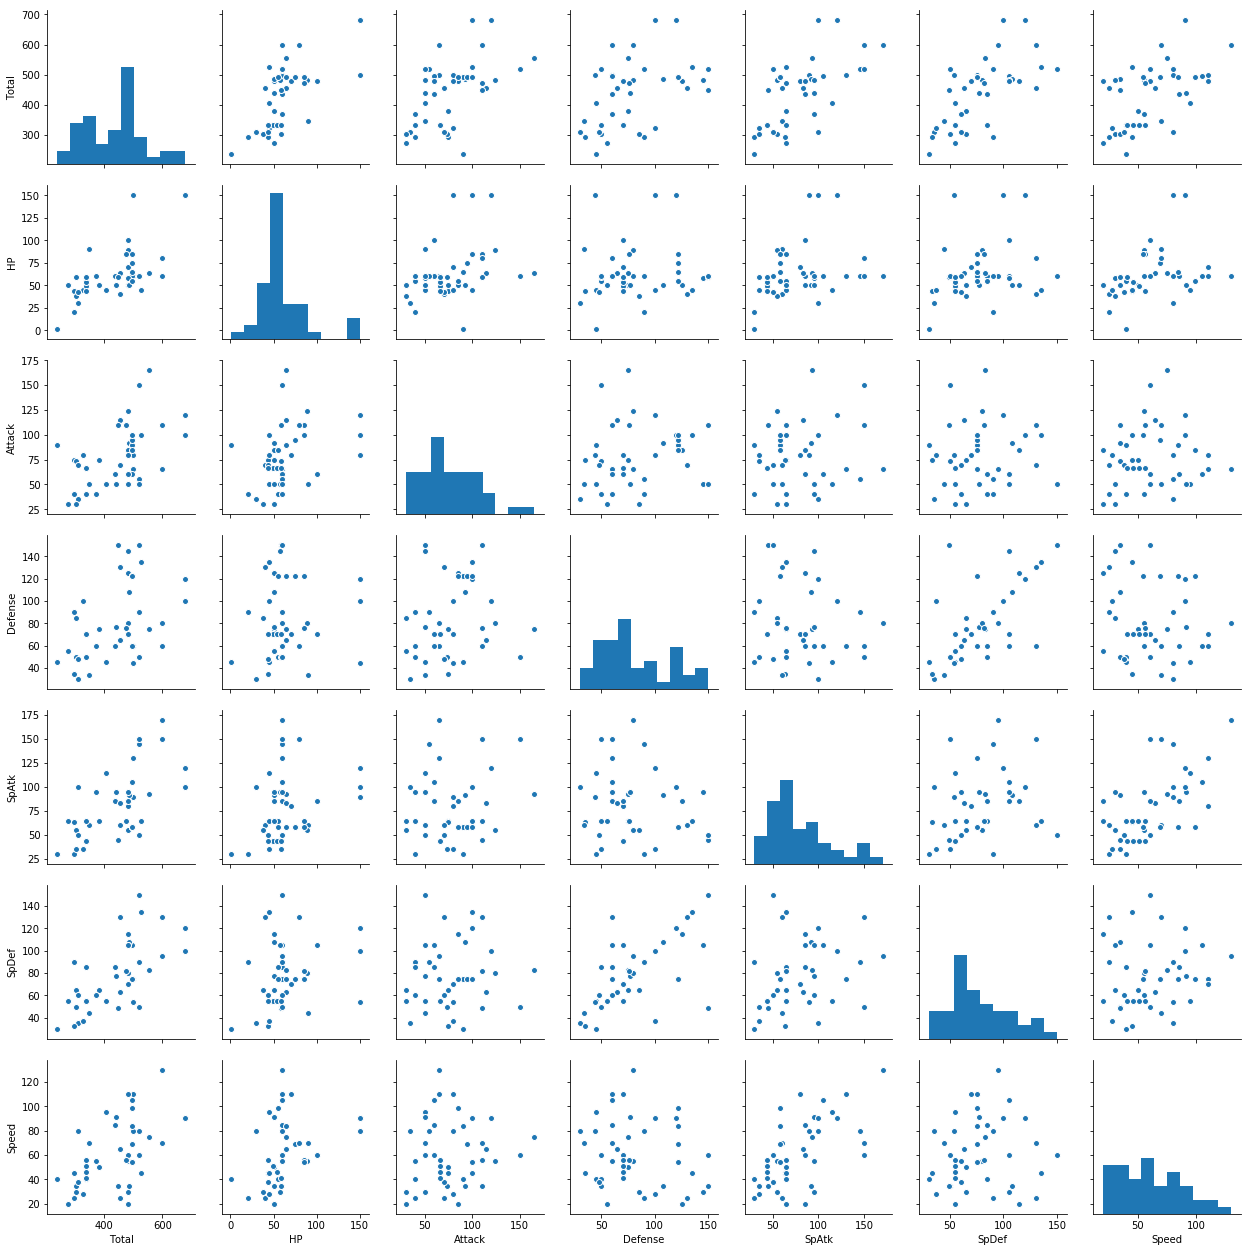

Ice


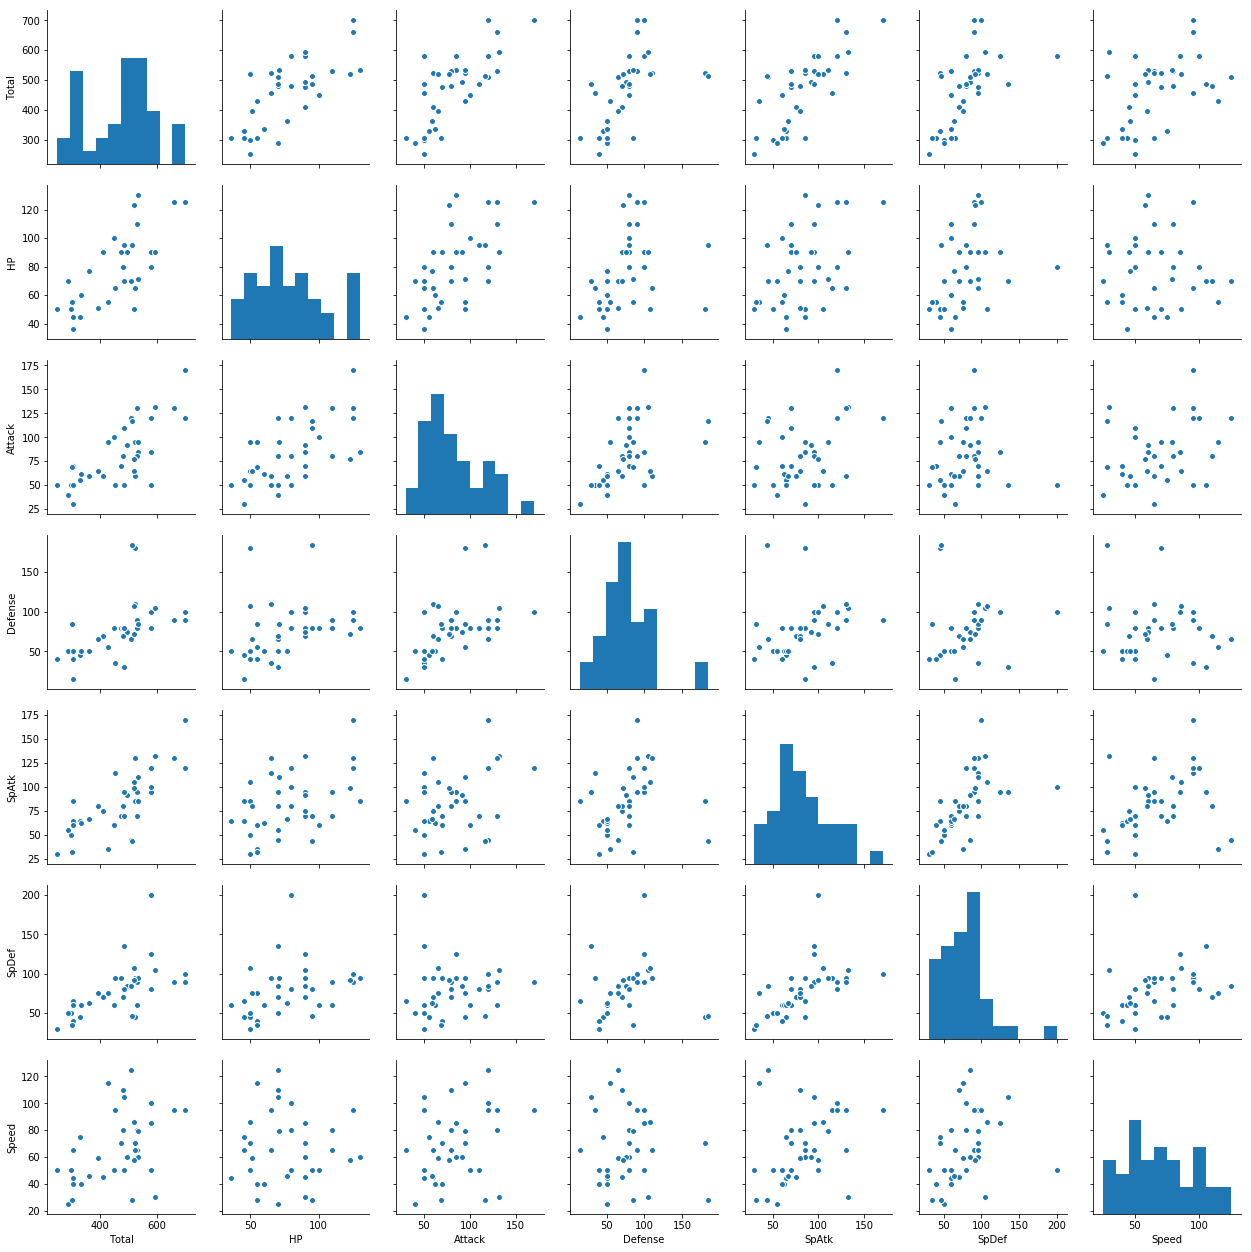

Dragon


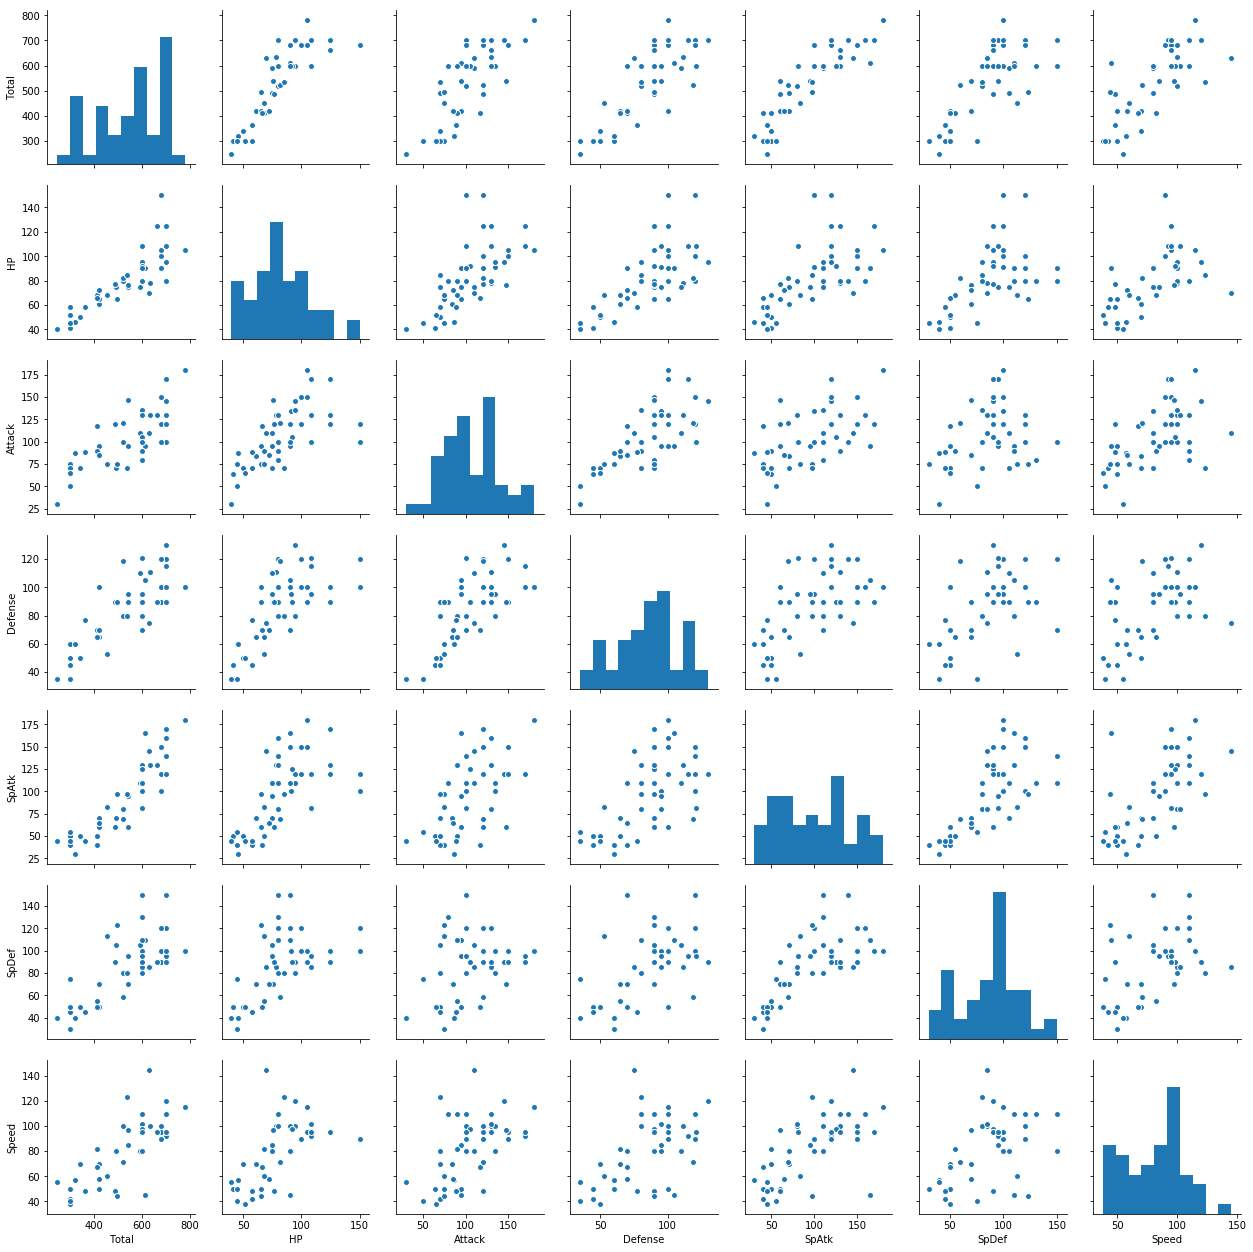

Dark


In [ ]:
dostepne_typy = pokemon.Type1.unique()
pokemon_corr_by_type = pokemon_wykres_type1.copy()
for typ in dostepne_typy:
    print(typ)
    sns.pairplot(pokemon_corr_by_type[(pokemon_corr_by_type.Type1 == typ) | (pokemon_corr_by_type.Type2 == typ)], 
                 kind="scatter")
    plt.show()